# Regressão Linear Múltipla: Predição de Saldo de Cartão de Crédito

Este notebook contém um exercício de regressão linear múltipla aplicado a uma base de dados com as seguintes características:

* Income - Renda
* Limit - Limite de crédito
* Rating - Score do Serasa
* Age - Idade
* Education - Anos de educação
* Gender - Gênero
* Student - É estudante? (Sim ou Não)
* Married - É casado(a)? (Sim ou Não)
* Ethnicity - Afro-americano, asiático ou branco
* Balance - Saldo médio do cartão de crédito em dólares

## Importante 1: 
Note que a base possui atributos como etnia e gênero. Como se tratam de dados fictícios e de um ambiente totalmente de aprendizado, não tomei o cuidado de excluí-los visto que, intencionalmente, quis expor esta situação para reflexão. Caso contrário, em um contexto 100% aplicado à vida real, deve-se tomar muito cuidado por questões éticas.

## Importante 2:
Esta base e exercício foram trabalhados durante um programa de Bootcamp que participei: uma parceria da escola Let's Code e Itaú. Gostaria de deixar os devidos créditos às duas Instituições e seus profissionais.

In [61]:
# importando as bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set()
pio.templates.default = 'plotly_dark'

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
import statsmodels.api as sm

In [62]:
# criando o DataFrame
credit: pd.DataFrame = pd.read_csv(
    'data/credit_regression.csv', 
    index_col=[0]
    )
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### Análise exploratória

#### Procurando por anormalidades na base

In [63]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [64]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [65]:
credit.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


In [66]:
credit[credit.duplicated()]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance


Não possuem valores nulos ou duplicados e, a princípio, não possuem valores "estranhos" (como limite, idade = 0  por exemplo).

#### Análise exploratória visual 

In [67]:
columns_categorical = credit.select_dtypes(exclude='number')
columns_categorical.columns

Index(['Gender', 'Student', 'Married', 'Ethnicity'], dtype='object')

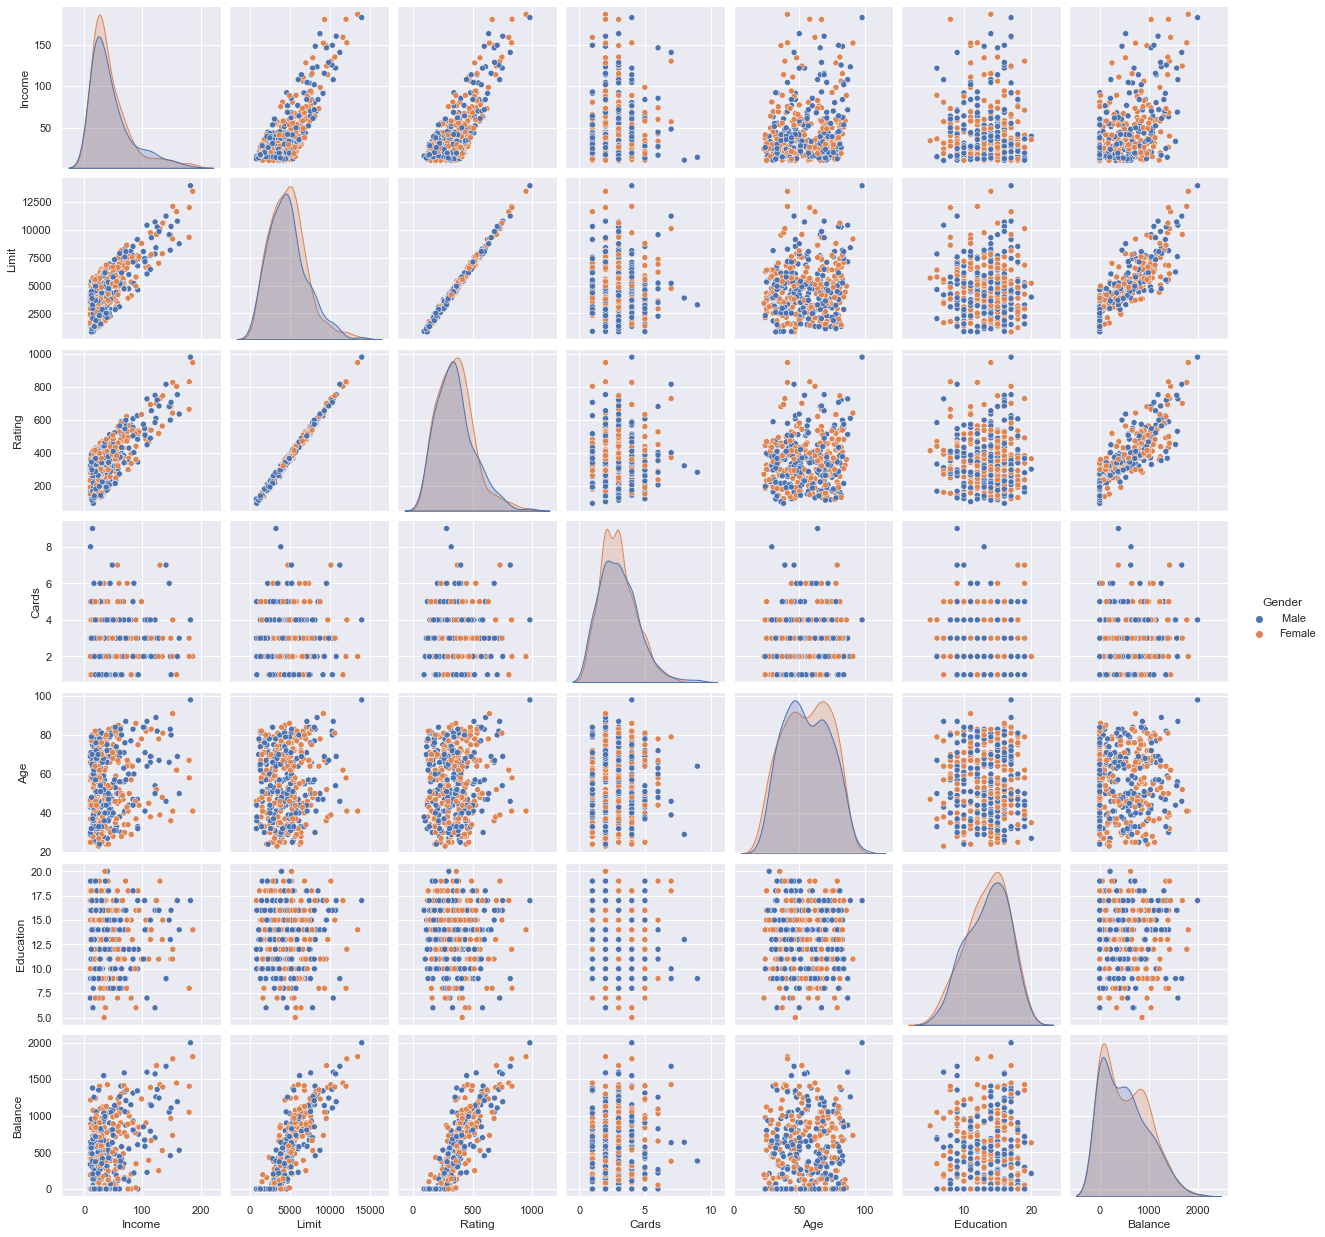

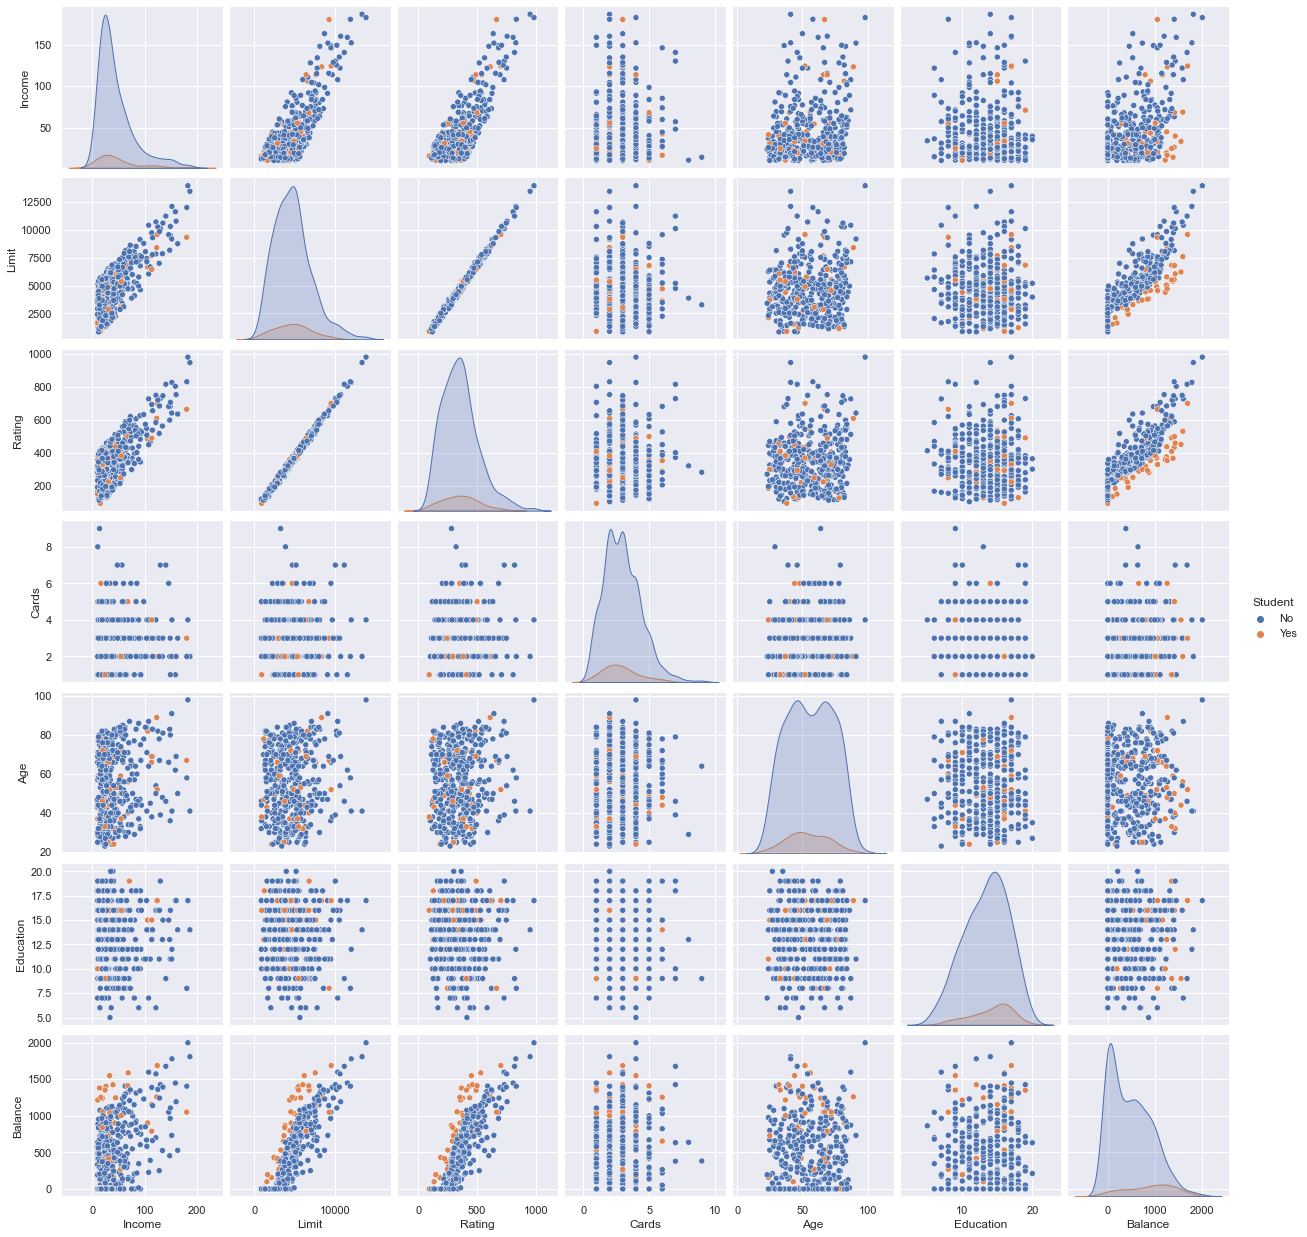

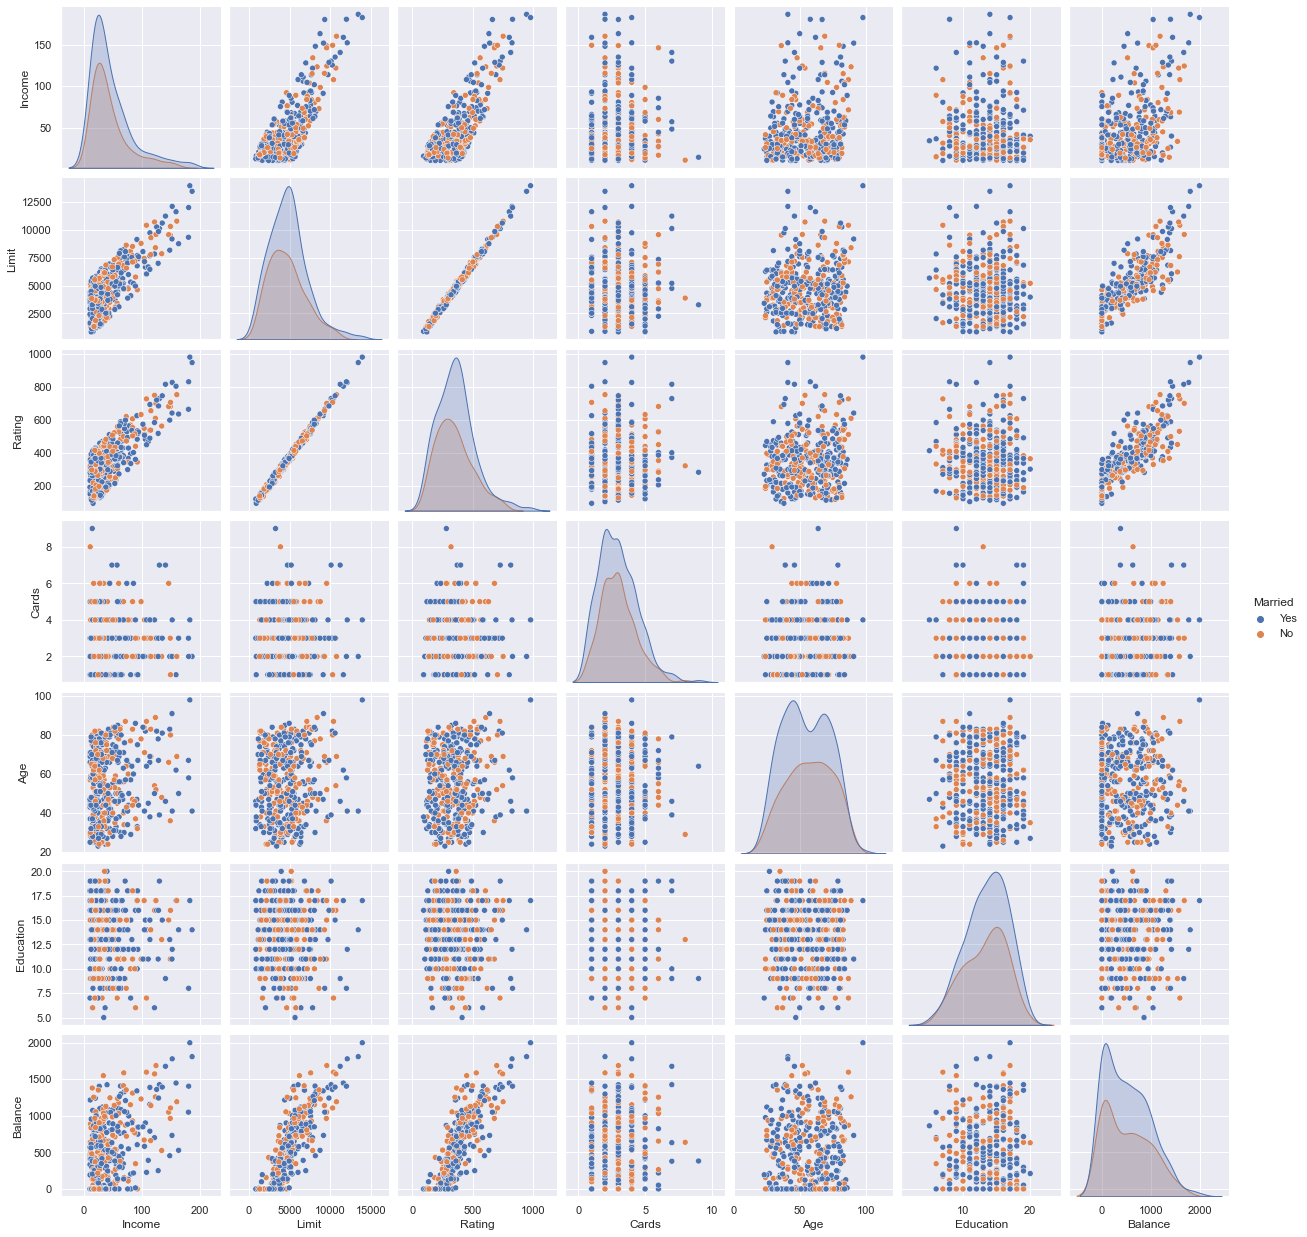

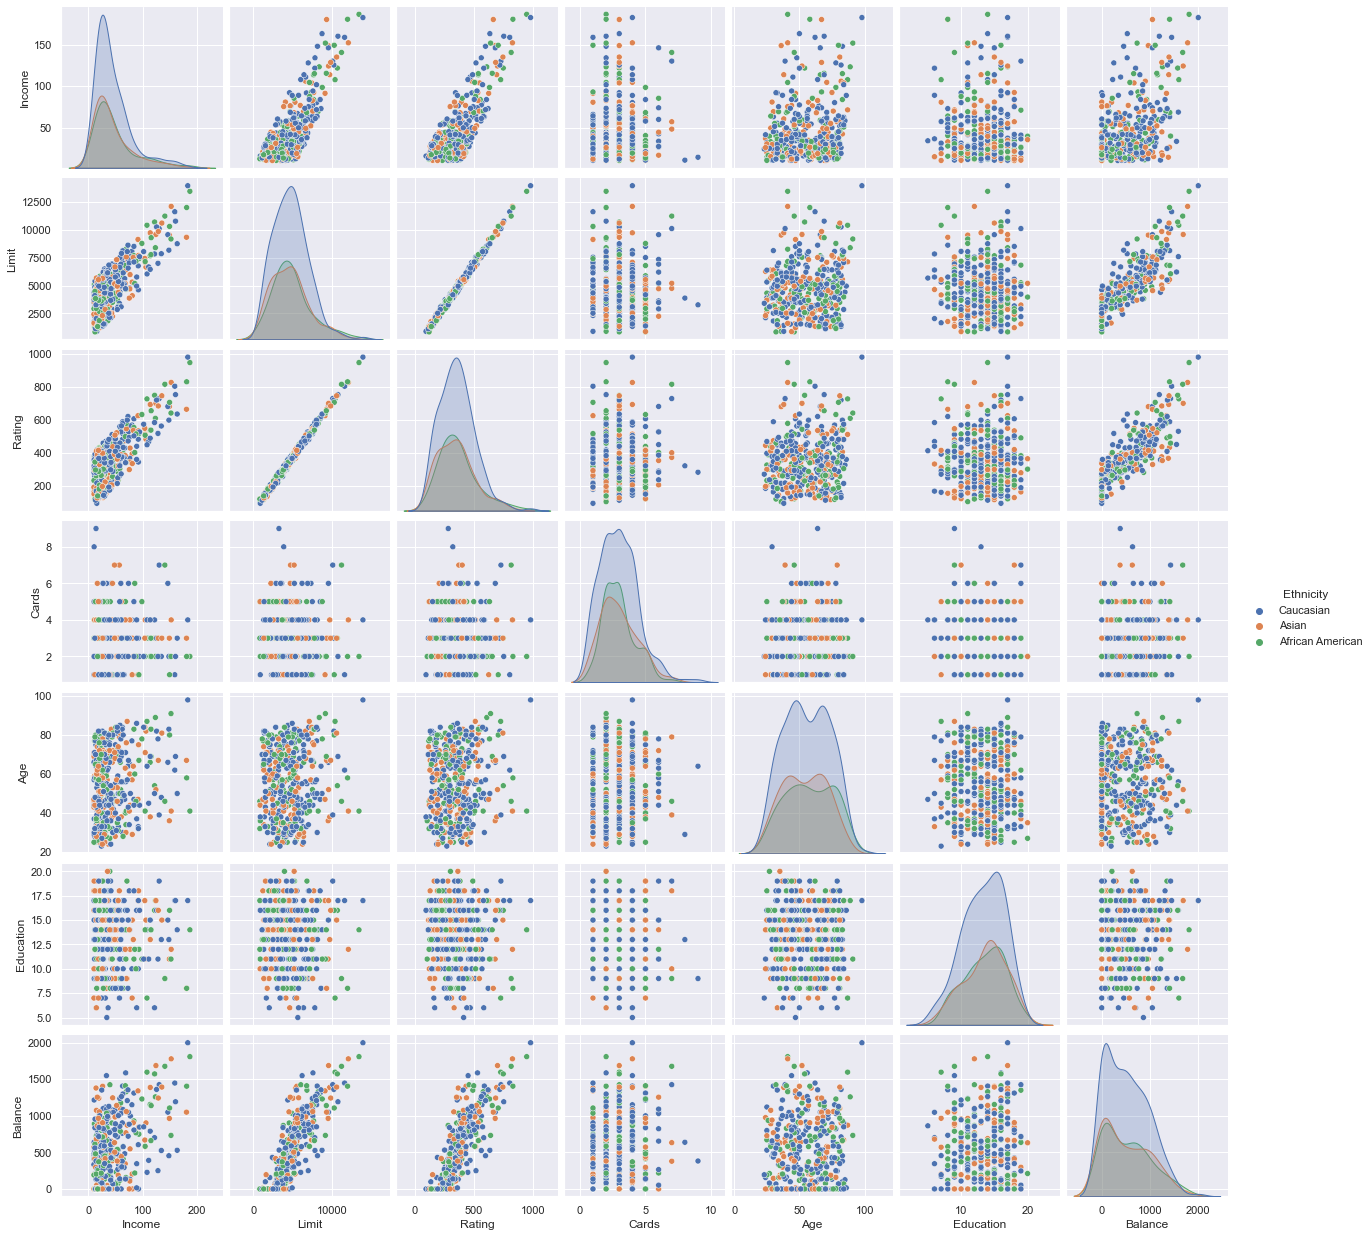

In [68]:
for column in columns_categorical.columns:
    sns.pairplot(credit, hue=column)

Parece que das variáveis categóricas a variável `Student` é a que mais influencia nos comportamentos dos dados.

<AxesSubplot:>

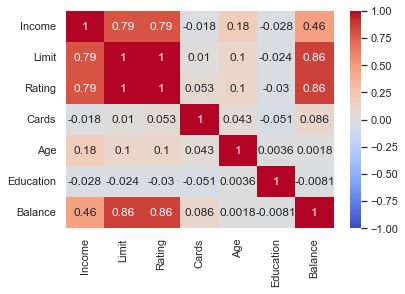

In [69]:
sns.heatmap(data=credit.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1)

Realizando análise apenas com variáveis numéricas:

In [70]:
X = credit.select_dtypes(include=['number']).drop(
    labels=['Balance'],
    axis=1
    )
y = credit['Balance']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [72]:
cross_validate(
    estimator=LinearRegression(),
    X=X_train, 
    y=y_train,
    scoring='r2',
    return_train_score=True,
    cv=5
    )

{'fit_time': array([0.00300312, 0.00299764, 0.00200033, 0.00201178, 0.00200915]),
 'score_time': array([0.00300741, 0.00099325, 0.00200152, 0.00099492, 0.00199366]),
 'test_score': array([0.88213431, 0.85007492, 0.88101452, 0.86758449, 0.8722436 ]),
 'train_score': array([0.87466604, 0.88285788, 0.87451075, 0.87905947, 0.87754318])}

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(X_test)

In [76]:
# Tabela de coeficientes
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coef'])

,Coef
Income,-7.615157
Limit,0.109348
Rating,2.282654
Cards,14.482592
Age,-1.105694
Education,2.177535


In [77]:
residuos = y_test - y_pred

<AxesSubplot:xlabel='Balance', ylabel='Balance'>

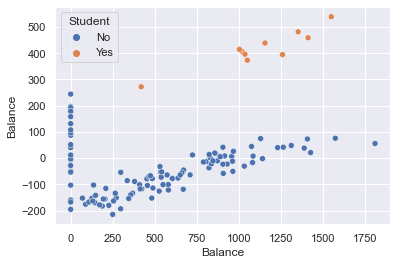

In [78]:
sns.scatterplot(x=y_test, y=residuos, hue=credit['Student'])

<AxesSubplot:xlabel='Balance', ylabel='Count'>

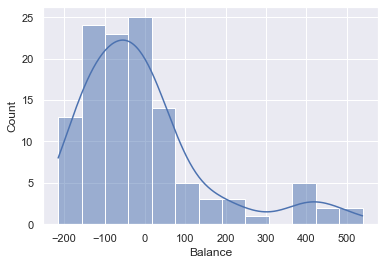

In [79]:
sns.histplot(residuos, kde=True)

Notam-se três comportamentos:
1. A "clusterização" segregando a dispersão dos resíduos pela variável Student;
2. A distribuiçao assimétrica positiva, em grande parte causada pela heterocedasticidade da amostra;
3. A existência de uma "categoria" que possui saldo médio nulo, onde os resíduos são possuem dispersões bem distribuídas.

Atributos categóricos podem influenciar o modelo de forma positiva. Além disso, é possivel criar um novo atributo (`Active`) a partir do saldo médio, onde:
- `Active` = 0 para saldo médio igual a 0;
- `Active` = 1 para saldo médio maior que 0.

In [80]:
credit_dummies = pd.get_dummies(credit, drop_first=True)

In [81]:
credit_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [82]:
credit_dummies['Active'] = credit_dummies['Balance'].map(lambda balance: 0 if balance == 0 else 1)

In [83]:
credit_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Active
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0,1
3,104.593,7075,514,4,71,11,580,0,0,0,1,0,1
4,148.924,9504,681,3,36,11,964,1,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1


In [84]:
X2 = credit_dummies.drop(columns=['Balance'])
y2 = credit_dummies['Balance']

In [85]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=2)

In [86]:
cross_validate(
    estimator=LinearRegression(),
    X=X_train2,
    y=y_train2,
    scoring='r2', 
    return_train_score=True, 
    cv=5
    )

{'fit_time': array([0.00299811, 0.0019958 , 0.00200009, 0.00300193, 0.00329804]),
 'score_time': array([0.00100064, 0.0010004 , 0.00200152, 0.        , 0.00199938]),
 'test_score': array([0.96674331, 0.9634347 , 0.98439515, 0.96480444, 0.96224992]),
 'train_score': array([0.9731754 , 0.97387166, 0.96849789, 0.97392221, 0.97375728])}

In [87]:
lr2 = LinearRegression().fit(X_train2, y_train2)

In [88]:
y_pred2 = lr2.predict(X_test2)

In [89]:
residuos2 = y_test2 - y_pred2

<AxesSubplot:xlabel='Balance', ylabel='Balance'>

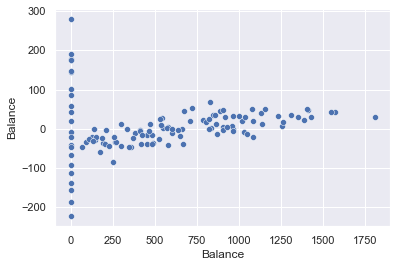

In [90]:
sns.scatterplot(x=y_test2, y=residuos2)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

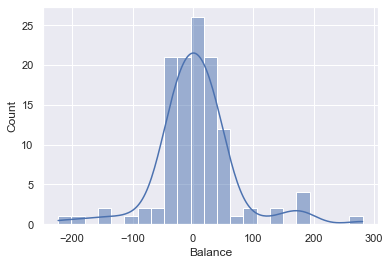

In [91]:
sns.histplot(residuos2, kde=True)

Agora nota-se uma grande melhoria nos resultados, tanto para a métrica de R² quanto para análise de resíduos, mesmo que ainda exista uma certa heterocedasticidade. O histograma nos mostra isso.

E se excluíssemos aqueles que possuem saldo nulo da análise?

In [92]:
credit_active = credit_dummies[credit_dummies['Active'] == 1]

In [93]:
credit_active.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Active
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0,1
3,104.593,7075,514,4,71,11,580,0,0,0,1,0,1
4,148.924,9504,681,3,36,11,964,1,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1


In [94]:
X_active = credit_active.drop(columns=['Balance', 'Active'])
y_active = credit_active['Balance']

In [95]:
X_active_train, X_active_test, y_active_train, y_active_test = train_test_split(X_active, y_active, random_state=2)

In [103]:
cross_validate(
    estimator=LinearRegression(),
    X=X_active_train,
    y=y_active_train,
    scoring='r2', 
    return_train_score=True, 
    cv=5
    )

{'fit_time': array([0.00499368, 0.00100183, 0.00200176, 0.00200963, 0.00200152]),
 'score_time': array([0.0010016 , 0.00200081, 0.00099945, 0.00099301, 0.00099874]),
 'test_score': array([0.99930068, 0.99932704, 0.99941174, 0.99939246, 0.99908464]),
 'train_score': array([0.99938136, 0.99937504, 0.99934984, 0.99935684, 0.99942777])}

In [96]:
lr_active = LinearRegression().fit(X_active_train, y_active_train)

In [97]:
y_active_pred = lr_active.predict(X_active_test)

In [98]:
residuos_active = y_active_test - y_active_pred

<AxesSubplot:xlabel='Balance', ylabel='Balance'>

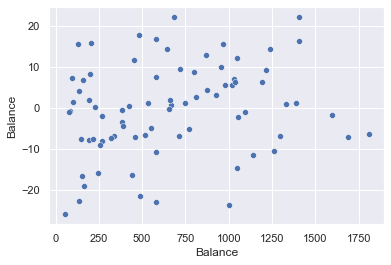

In [101]:
sns.scatterplot(x=y_active_test, y=residuos_active)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

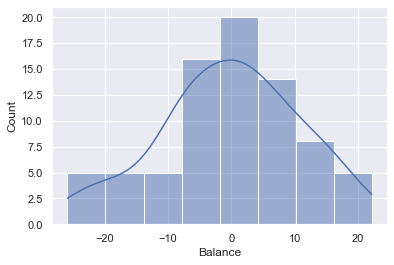

In [102]:
sns.histplot(residuos_active, kde=True)

De fato, os registros com saldo nulo influenciavam de forma negativa na construção do modelo uma vez que agora temos um resultado muito mais preciso.

## Bônus
Dado que o atributo `Active` é uma variável binária e influenciou bastante no modelo, podemos levantar a seguinte questão: 
**Podemos aplicar um modelo de classificação antes para determinar se é `Active` ou não, sem saber o saldo? Podemos combinar um modelo de Regressão Logística seguido de um Modelo de Regressão Linear?**

Irei fazer estes testes no próximo commit.